Centro de Inovação em Inteligência Artificial para a Saúde da UFMG

**Curso de Introdução à Análise de Dados em Saúde com Python**

**Prof. Juliano Gaspar** - Faculdade de Medicina da UFMG

Acesse: https://ciia-saude.medicina.ufmg.br/

# **Visualização e formatação de gráficos**

In [1]:
# importar as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

import statistics  as sts
import scipy.stats as stats

# Abrir o arquivo

In [2]:
# Endereço do arquivo com a base de dados
arquivo = 'https://ftp.medicina.ufmg.br/cursosciia/iads/BD_PARTOS.xlsx'

# Ler o arquivo
dados = pd.read_excel(arquivo)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708 entries, 0 to 1707
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          1708 non-null   int64         
 1   DT_INTERNACAO       1708 non-null   datetime64[ns]
 2   DT_ALTA             1708 non-null   datetime64[ns]
 3   DURACAO_INT         1708 non-null   int64         
 4   GESTACOES           1708 non-null   int64         
 5   PARTOS              1707 non-null   float64       
 6   IG_OBSTETRA         1686 non-null   float64       
 7   IG_PEDIATRA         1704 non-null   float64       
 8   ALTO_RISCO          1708 non-null   object        
 9   TIPO_PARTO          1708 non-null   object        
 10  HIPERTENSAO         1708 non-null   object        
 11  GEMELAR             1708 non-null   object        
 12  CESAREAS_PREVIAS    1701 non-null   float64       
 13  EPISIOTOMIA         1708 non-null   object      

# Gráficos de Histogramas

<Axes: xlabel='IG_OBSTETRA', ylabel='Count'>

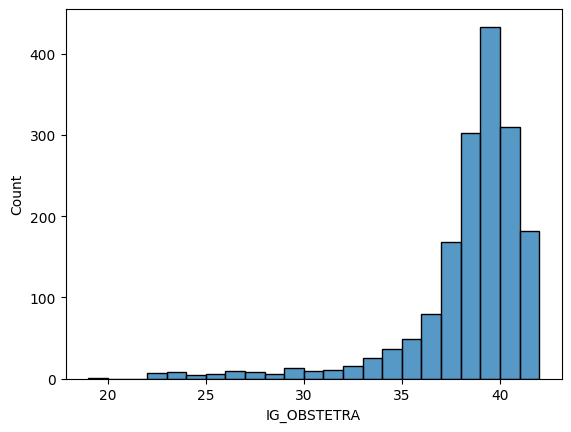

In [3]:
sns.histplot(dados.IG_OBSTETRA, binwidth=1)

Cores: https://matplotlib.org/stable/gallery/color/named_colors.html

(array([  0., 100., 200., 300., 400., 500.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500')])

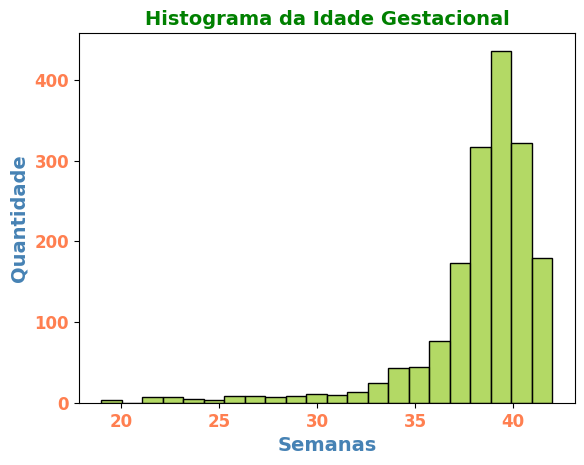

In [4]:
# Histograma da idade gestacional
graf1 = sns.histplot(dados.IG_PEDIATRA, bins=22, color='yellowgreen')

# Formatando o título
graf1.set_title('Histograma da Idade Gestacional', fontsize=14, fontweight='bold', color='green')

# Formatando os rótulos dos eixos
graf1.set_xlabel('Semanas', fontsize=14, fontweight='bold', color='steelblue')
graf1.set_ylabel('Quantidade', fontsize=14, fontweight='bold', color='steelblue')

# Formatando os ticks (números dos eixos)
plt.xticks(fontsize=12, fontweight='bold', color='coral')
plt.yticks(fontsize=12, fontweight='bold', color='coral')

Text(0, 0.5, 'Quantidade')

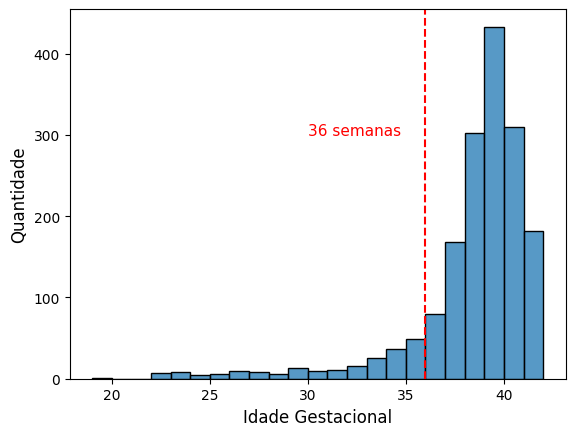

In [5]:
# Criando o gráfico
graf1 = sns.histplot(dados.IG_OBSTETRA, binwidth=1)

# Incluindo uma linha no gráfico (axvline, axhline)
graf1.axvline(36, color='red', linestyle='--', linewidth=1.5)

# Incluindo um texto e uma seta no gráfico
graf1.annotate('36 semanas', color='red', xytext=(30, 300), fontsize=11, xy=(30, 300))

# Definindo os valores do eixo x
graf1.set_xticks([20,25,30,35,40])

# Formatando os rótulos do eixos x e y
graf1.set_xlabel('Idade Gestacional', fontsize=12)
graf1.set_ylabel('Quantidade', fontsize=12)

Mediana do Grupo 1: 3.0
Mediana do Grupo 2: 2.0
Mediana do Grupo 3: 2.0

Teste de Kruskal-Wallis - 3+ medianas
p-value: 0.000
Rejeita H0 => As medianas são diferentes!



Text(1033.6413398692812, 0.5, 'Quantidade')

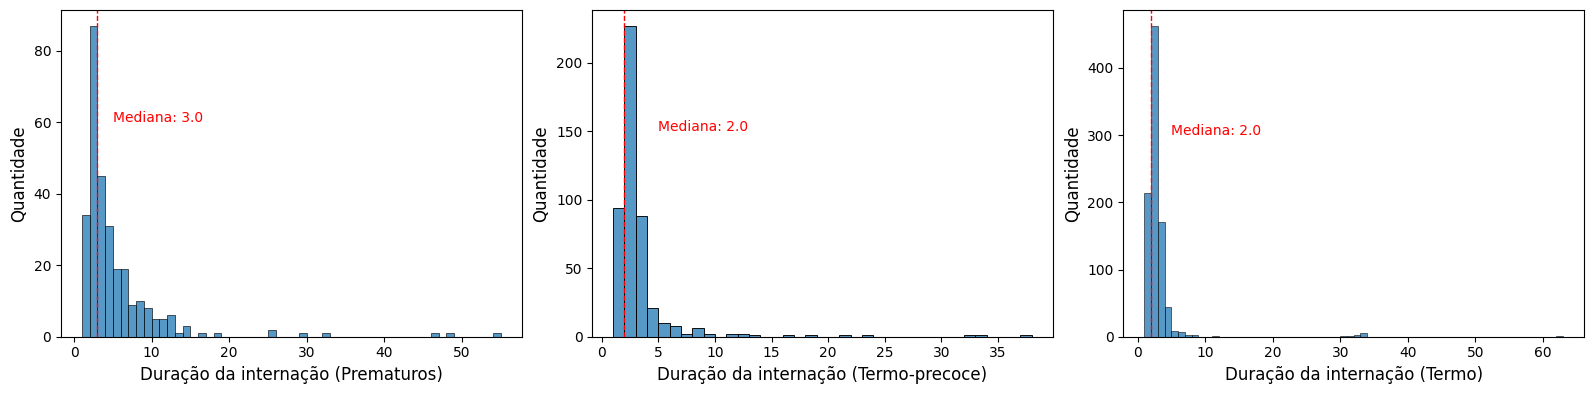

In [6]:
# Selecionar os nomes das variáveis  (DURACAO_INT, IG_TERMO)
varNumerica = 'DURACAO_INT'
varCategorica = 'IG_TERMO'

# Filtrar registros que sem nulos nas duas colunas
dados2 = dados.dropna(how = 'any', subset=[varNumerica, varCategorica])

# Separar os dois grupos pela categoria, e selecionar só a coluna numérica desejada
grupo1 = dados2[(dados2.IG_TERMO == 'Prematuro')].DURACAO_INT
grupo2 = dados2[(dados2.IG_TERMO == 'Termo-precoce')].DURACAO_INT
grupo3 = dados2[(dados2.IG_TERMO == 'Termo')].DURACAO_INT

# 1ª ETAPA - Estatística descritiva

# Estatística descritiva - Análise dos valores medianos
medianG1 = grupo1.median()
medianG2 = grupo2.median()
medianG3 = grupo3.median()

print(f'Mediana do Grupo 1: {medianG1:.1f}')
print(f'Mediana do Grupo 2: {medianG2:.1f}')
print(f'Mediana do Grupo 3: {medianG3:.1f}')
print()

# _______________________________________________________________________________________
# 2º ETAPA - Realizar o teste de medianas para 3 ou mais variáveis independentes

# 3º realizar o teste H - Kruskal-Wallis
# H0 = as medianas são iguais

# Observação: kruskal não aceita coluna do pandas diretamente, precisa usar ".values" para pegar só valor

resultado = stats.mstats.kruskal(grupo1.values, grupo2.values, grupo3.values)
print('Teste de Kruskal-Wallis - 3+ medianas')
print(f'p-value: {resultado.pvalue:.3f}')

# interpretação
if resultado.pvalue <= 0.05:
    print('Rejeita H0 => As medianas são diferentes!')
else:
    print('Aceita H0 => As medianas são iguais!')

# _______________________________________________________________________________________
print()
# Estatística descritiva - Análise Gráfica -> Mostrar 3 histogramas

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
sns.histplot(grupo1, ax=ax1, binwidth=1)
sns.histplot(grupo2, ax=ax2, binwidth=1)
sns.histplot(grupo3, ax=ax3, binwidth=1)
plt.tight_layout()

# _______________________________________________________________________________________
# formatando o gráfico

ax1.axvline(medianG1, color='red', linestyle='--', linewidth=1)
texto = f'Mediana: {medianG1:.1f}'
ax1.annotate(texto, color='red', xy=(5, 60), xytext=(5, 60), fontsize=10)
ax1.set_xlabel('Duração da internação (Prematuros)', fontsize=12)
ax1.set_ylabel('Quantidade', fontsize=12)

ax2.axvline(medianG2, color='red', linestyle='--', linewidth=1)
texto = f'Mediana: {medianG2:.1f}'
ax2.annotate(texto, color='red', xy=(5, 150), xytext=(5, 150), fontsize=10)
ax2.set_xlabel('Duração da internação (Termo-precoce)', fontsize=12)
ax2.set_ylabel('Quantidade', fontsize=12)

ax3.axvline(medianG3, color='red', linestyle='--', linewidth=1)
texto = f'Mediana: {medianG3:.1f}'
ax3.annotate(texto, color='red', xy=(5, 300), xytext=(5, 300), fontsize=10)
ax3.set_xlabel('Duração da internação (Termo)', fontsize=12)
ax3.set_ylabel('Quantidade', fontsize=12)

# Gráficos de dispersão

<Axes: xlabel='IG_OBSTETRA', ylabel='PESO_NASCER'>

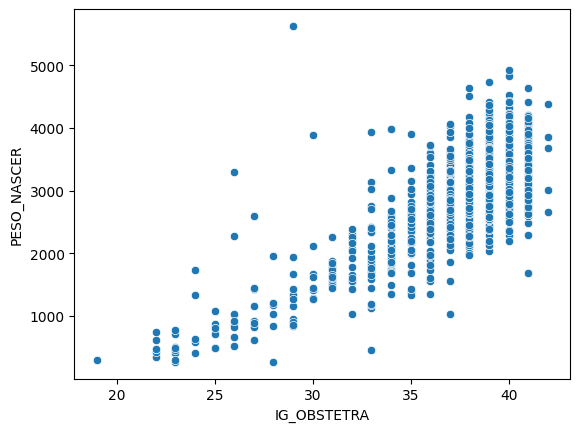

In [7]:
# Gráfico de dispersão
sns.scatterplot(data=dados, x="IG_OBSTETRA", y="PESO_NASCER")

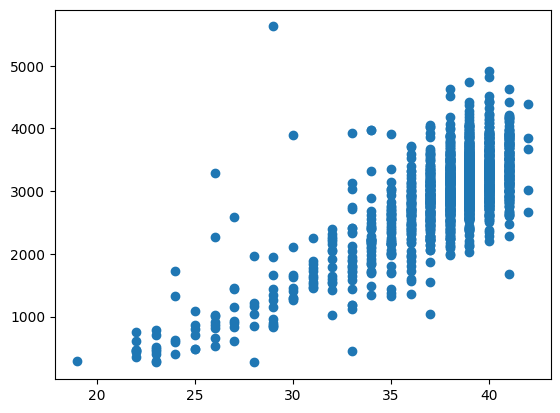

In [ ]:
# Scatter é uma função que faz gráfico de dispersão presente na biblioteca Matplotlib

plt.scatter(data=dados, x='IG_OBSTETRA', y='PESO_NASCER')

plt.show()

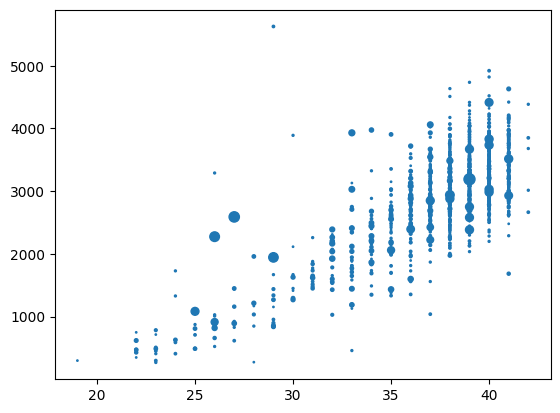

In [8]:
# Scatter é uma função que faz gráfico de dispersão presente na biblioteca Matplotlib
# s size, c color
plt.scatter(data=dados, x='IG_OBSTETRA', y='PESO_NASCER', s='DURACAO_INT')

plt.show()

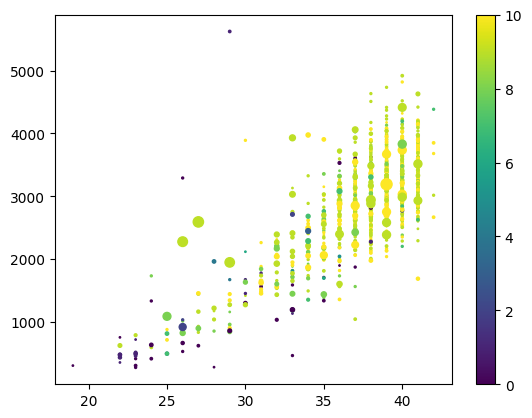

In [ ]:
# Scatter é uma função que faz gráfico de dispersão presente na biblioteca Matplotlib
# s size, c color
plt.scatter(data=dados, x='IG_OBSTETRA', y='PESO_NASCER', s='DURACAO_INT', c='APGAR5')
plt.colorbar()

plt.show()

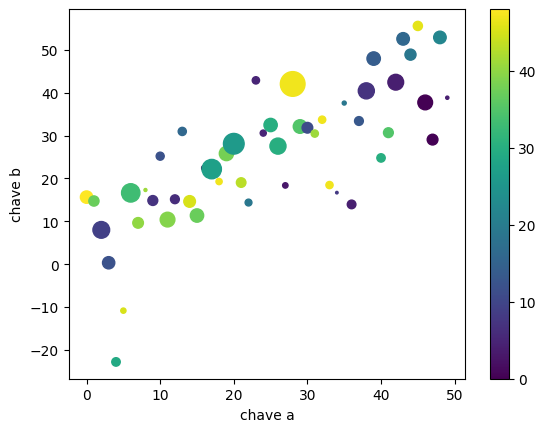

In [9]:
# Exemplo de gráfico de dispersão com 4 eixos (4 variáveis): x, y, tamanho e cor

# simulando os dados A, B, C e D
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

# Crindo o gráfico
plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('chave a')
plt.ylabel('chave b')
plt.colorbar()
plt.show()

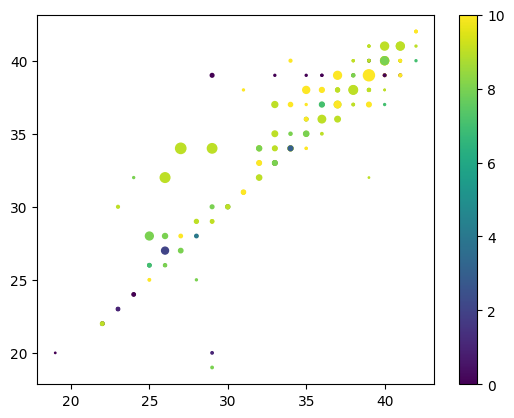

In [10]:
# s size, c color
plt.scatter(data=dados, x='IG_OBSTETRA', y='IG_PEDIATRA', s='DURACAO_INT', c='APGAR5')
plt.colorbar()
plt.show()

# Gráficos Colunas - mostrando o total por mês

**Exemplo: construir um gráfico de colunas ou linhas com o total de internações por mês do ano de 2014**

In [11]:
# Selecionar os partos de 2014
dados2014 = dados[ (dados.DT_INTERNACAO.dt.year == 2014) ]

In [12]:
# contar por ano
totalMes = dados2014.DT_INTERNACAO.dt.month.value_counts()
totalMes

,count
DT_INTERNACAO,
2,182
5,170
4,153
1,140
3,131
6,110
7,109
10,103
8,74


<Axes: xlabel='DT_INTERNACAO'>

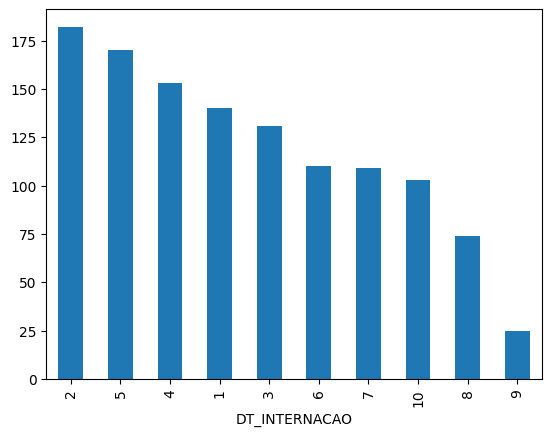

In [13]:
# Criar gráfico por mês
totalMes.plot.bar()

In [14]:
lista = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
lista

['Jan',
 'Fev',
 'Mar',
 'Abr',
 'Mai',
 'Jun',
 'Jul',
 'Ago',
 'Set',
 'Out',
 'Nov',
 'Dez']

In [15]:
dfMeses = pd.DataFrame(lista)
dfMeses

,0
0,Jan
1,Fev
2,Mar
3,Abr
4,Mai
5,Jun
6,Jul
7,Ago
8,Set
9,Out


In [16]:
# Alterar nomes das colunas
dfMeses.columns = ['MESES']
dfMeses

,MESES
0,Jan
1,Fev
2,Mar
3,Abr
4,Mai
5,Jun
6,Jul
7,Ago
8,Set
9,Out


In [17]:
# Localizar um sub-conjunto de dados, criar uma nova variável e atribuir um valor 'qualquer'

# selecionar todos do mês
MES = dados2014.DT_INTERNACAO.dt.month == 1
# guardar o total do mês na tabela
dfMeses.loc[ (dfMeses.MESES ==  'Jan' ), 'TOTAL' ] = MES.sum()

# para conferir
dfMeses

,MESES,TOTAL
0,Jan,140.0
1,Fev,NaN
2,Mar,NaN
3,Abr,NaN
4,Mai,NaN
5,Jun,NaN
6,Jul,NaN
7,Ago,NaN
8,Set,NaN
9,Out,NaN


In [18]:
# Localizar um sub-conjunto de dados, criar uma nova variável e atribuir um valor 'qualquer'

# selecionar todos do mês
MES = dados2014.DT_INTERNACAO.dt.month == 1
# guardar o total do mês na tabela
dfMeses.loc[ (dfMeses.MESES ==  'Jan' ), 'TOTAL' ] = MES.sum()

# selecionar todos do mês
MES = dados2014.DT_INTERNACAO.dt.month == 2
# guardar o total do mês na tabela
dfMeses.loc[ (dfMeses.MESES ==  'Fev' ), 'TOTAL' ] = MES.sum()

# selecionar todos do mês
MES = dados2014.DT_INTERNACAO.dt.month == 3
# guardar o total do mês na tabela
dfMeses.loc[ (dfMeses.MESES ==  'Mar' ), 'TOTAL' ] = MES.sum()

# selecionar todos do mês
MES = dados2014.DT_INTERNACAO.dt.month == 4
# guardar o total do mês na tabela
dfMeses.loc[ (dfMeses.MESES ==  'Abr' ), 'TOTAL' ] = MES.sum()

# selecionar todos do mês
MES = dados2014.DT_INTERNACAO.dt.month == 5
# guardar o total do mês na tabela
dfMeses.loc[ (dfMeses.MESES ==  'Mai' ), 'TOTAL' ] = MES.sum()

# selecionar todos do mês
MES = dados2014.DT_INTERNACAO.dt.month == 6
# guardar o total do mês na tabela
dfMeses.loc[ (dfMeses.MESES ==  'Jun' ), 'TOTAL' ] = MES.sum()

# selecionar todos do mês
MES = dados2014.DT_INTERNACAO.dt.month == 7
# guardar o total do mês na tabela
dfMeses.loc[ (dfMeses.MESES ==  'Jul' ), 'TOTAL' ] = MES.sum()

# selecionar todos do mês
MES = dados2014.DT_INTERNACAO.dt.month == 8
# guardar o total do mês na tabela
dfMeses.loc[ (dfMeses.MESES ==  'Ago' ), 'TOTAL' ] = MES.sum()

# selecionar todos do mês
MES = dados2014.DT_INTERNACAO.dt.month == 9
# guardar o total do mês na tabela
dfMeses.loc[ (dfMeses.MESES ==  'Set' ), 'TOTAL' ] = MES.sum()

# selecionar todos do mês
MES = dados2014.DT_INTERNACAO.dt.month == 10
# guardar o total do mês na tabela
dfMeses.loc[ (dfMeses.MESES ==  'Out' ), 'TOTAL' ] = MES.sum()

# selecionar todos do mês
MES = dados2014.DT_INTERNACAO.dt.month == 11
# guardar o total do mês na tabela
dfMeses.loc[ (dfMeses.MESES ==  'Nov' ), 'TOTAL' ] = MES.sum()

# selecionar todos do mês
MES = dados2014.DT_INTERNACAO.dt.month == 12
# guardar o total do mês na tabela
dfMeses.loc[ (dfMeses.MESES ==  'Dez' ), 'TOTAL' ] = MES.sum()

# para conferir
dfMeses

,MESES,TOTAL
0,Jan,140.0
1,Fev,182.0
2,Mar,131.0
3,Abr,153.0
4,Mai,170.0
5,Jun,110.0
6,Jul,109.0
7,Ago,74.0
8,Set,25.0
9,Out,103.0


<Axes: >

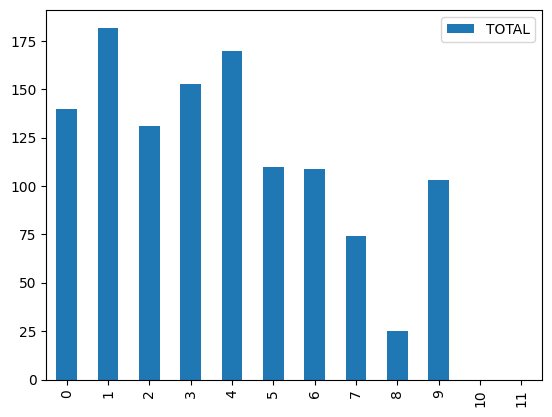

In [19]:
# Criar gráfico por mês
dfMeses.plot.bar()

In [20]:
# Variável LISTA já contem os nomes dos meses
lista

['Jan',
 'Fev',
 'Mar',
 'Abr',
 'Mai',
 'Jun',
 'Jul',
 'Ago',
 'Set',
 'Out',
 'Nov',
 'Dez']

[Text(0, 0, 'Jan'),
 Text(1, 0, 'Fev'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Abr'),
 Text(4, 0, 'Mai'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Ago'),
 Text(8, 0, 'Set'),
 Text(9, 0, 'Out'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dez')]

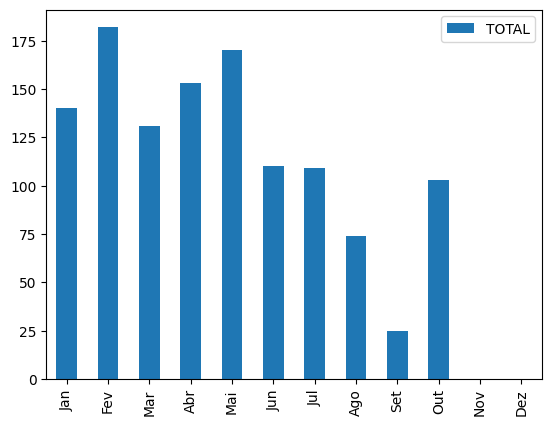

In [21]:
# Criar gráfico por mês
graf = dfMeses.plot.bar()

graf.set_xticklabels(lista)

# Gráficos de linhas - mostrando o total por mês

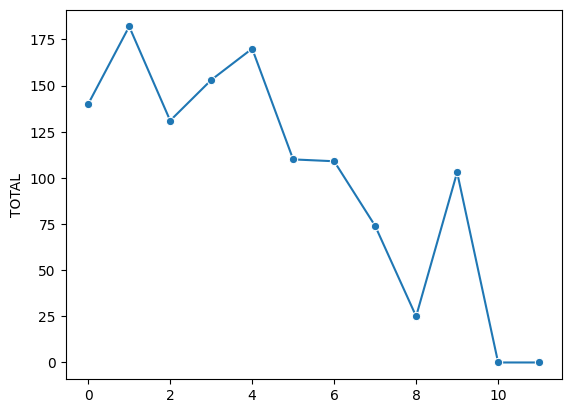

In [ ]:
# Gráfico de linhas
graf = sns.lineplot(data=dfMeses.TOTAL, markers=True, marker='o', legend=False)

[Text(0, 0, 'Jan'),
 Text(1, 0, 'Fev'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Abr'),
 Text(4, 0, 'Mai'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Ago'),
 Text(8, 0, 'Set'),
 Text(9, 0, 'Out'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dez')]

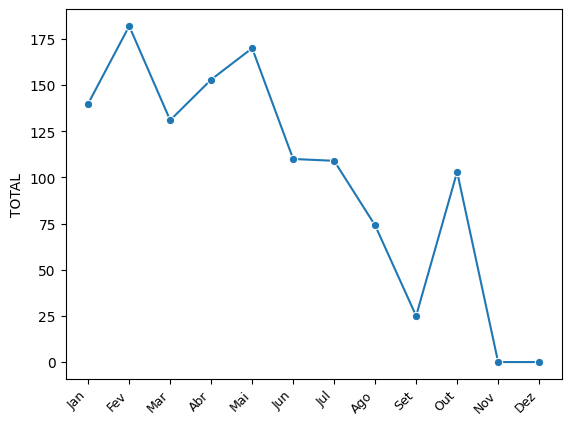

In [22]:
# Gráfico de linhas
graf2 = sns.lineplot(data=dfMeses.TOTAL, markers=True, marker='o', legend=False)

# Definindo os valores do eixo x
graf2.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
graf2.set_xticklabels(lista, rotation=45, ha='right', fontsize=9)

# Gráficos de Boxplot

<Axes: ylabel='PESO_NASCER'>

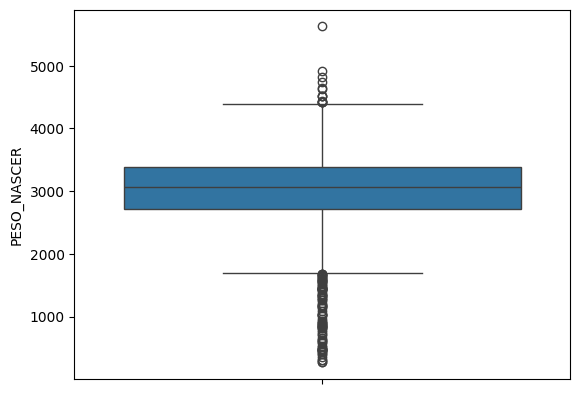

In [ ]:
# Boxplot simples
sns.boxplot(data=dados, y='PESO_NASCER')

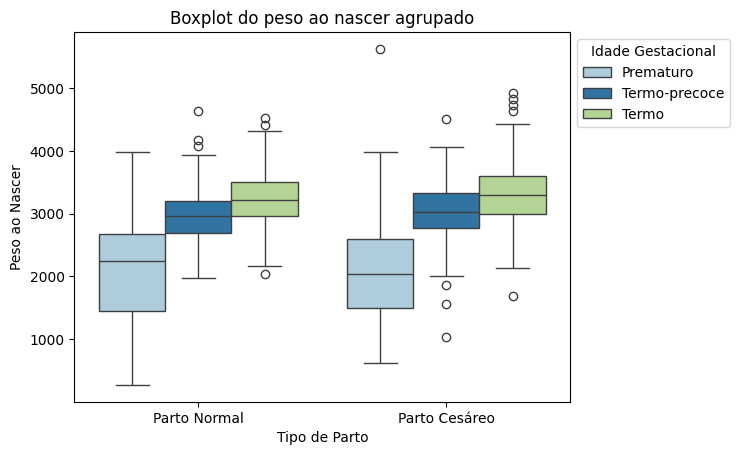

In [23]:
# Criar uma variável contendo a ordem desejada
ordem = ['Prematuro', 'Termo-precoce', 'Termo']

# Boxplot agrupado e subdividido por categoria
graf1 = sns.boxplot(data=dados, y='PESO_NASCER', x='TIPO_PARTO', hue='IG_TERMO', hue_order=ordem, palette="Paired", linewidth=1)

# Formatar o título do gráfico
graf1.set_title('Boxplot do peso ao nascer agrupado')

# Formatar os rótulos dos eixos
graf1.set_xlabel("Tipo de Parto")
graf1.set_ylabel("Peso ao Nascer")

# Colocar a legenda ao lado do gráfico
graf1.legend(bbox_to_anchor=(1,1), title='Idade Gestacional')

# Multiplos gráficos em uma figura

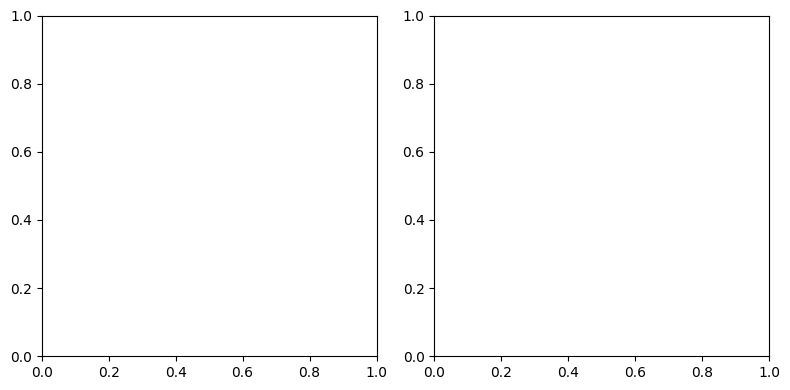

In [24]:
# Mostrar vários gráficos em uma única figura - Exemplo 2 gráficos em 1 figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))


#ajusta o layout
plt.tight_layout()

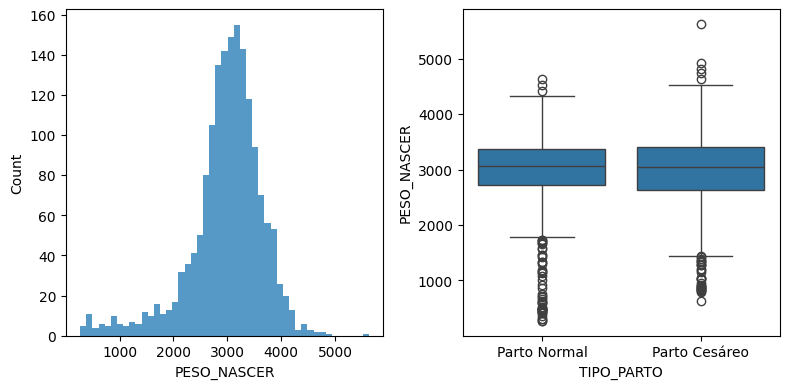

In [25]:
# Mostrar vários gráficos em uma única figura - Exemplo 2 gráficos em 1 figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# histograma
sns.histplot(dados.PESO_NASCER, linewidth=0, ax=ax1)

# Boxplot
sns.boxplot(data=dados, y='PESO_NASCER', x='TIPO_PARTO', linewidth=1, ax=ax2)

#ajusta o layout
plt.tight_layout()

# para salvar/preparar a figura (depois baixar)
plt.savefig('grafico.jpg', format='jpg', dpi=300)

Saiba mais: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/index.html

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

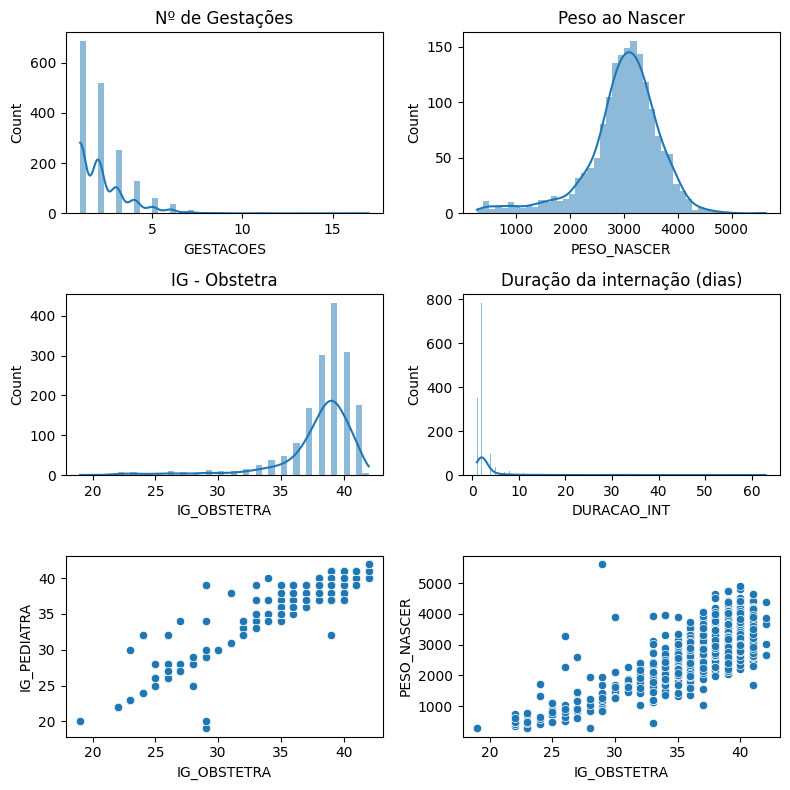

In [26]:
#impresssão em gráfico 3 x 2
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(8, 8))

# Histograma GESTACOES
sns.histplot(dados.GESTACOES, kde=True, linewidth=0, ax=ax1).set_title('Nº de Gestações')

# Histograma PESO_NASCER
sns.histplot(dados.PESO_NASCER, kde=True, linewidth=0, ax=ax2).set_title('Peso ao Nascer')

# Histograma IG_OBSTETRA
sns.histplot(dados.IG_OBSTETRA, kde=True, linewidth=0, ax=ax3).set_title('IG - Obstetra')

# Histograma DURACAO_INT
sns.histplot(dados.DURACAO_INT, kde=True, linewidth=0, ax=ax4).set_title('Duração da internação (dias)')

# Dispersão x="IG_OBSTETRA", y="IG_PEDIATRA"
sns.scatterplot(data=dados, x="IG_OBSTETRA", y="IG_PEDIATRA", ax=ax5)

# Dispersão x="IG_OBSTETRA", y="PESO_NASCER"
sns.scatterplot(data=dados, x="IG_OBSTETRA", y="PESO_NASCER", ax=ax6)

#ajusta o layout para não haver sobreposição
plt.tight_layout()

nome_arquivo = 'FiguraAtividade_10.jpg'
plt.savefig(nome_arquivo, format='jpg', dpi=300)
files.download(nome_arquivo)

# Outras formatações de gráficos

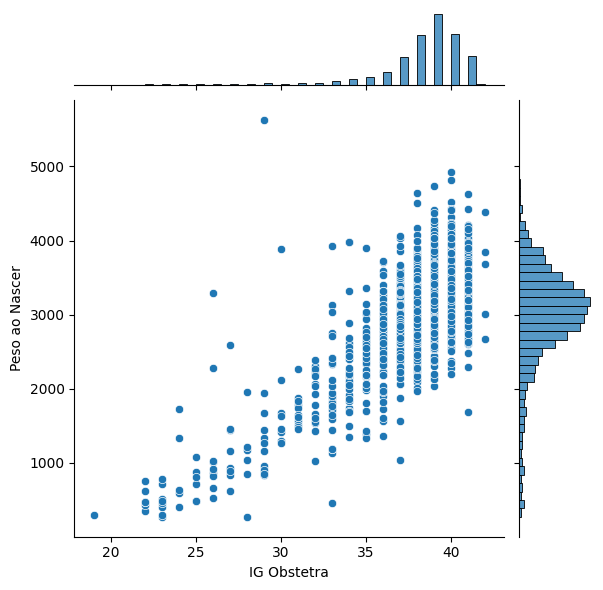

In [27]:
# Jointplot: combina o gráfico de dispersão com histogramas
graf1 = sns.jointplot(x=dados.IG_OBSTETRA, y=dados.PESO_NASCER, kind="scatter")

# Formatar os rótulos dos eixos x e y
graf1.set_axis_labels("IG Obstetra", "Peso ao Nascer")

<Axes: xlabel='PESO_NASCER', ylabel='Count'>

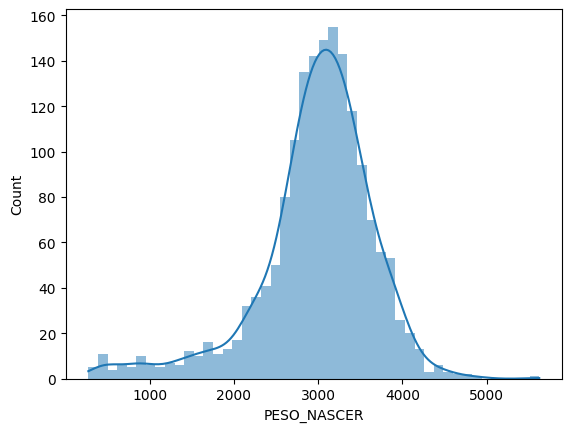

In [ ]:
# Relembrando:
# Histograma PESO_NASCER
sns.histplot(dados.PESO_NASCER, kde=True, linewidth=0)

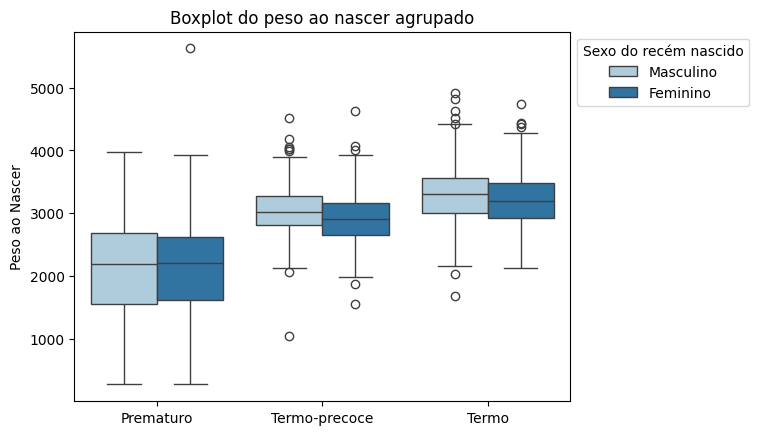

In [28]:
# Relembrando:
# Criar uma variável contendo a ordem desejada
ordem = ['Prematuro', 'Termo-precoce', 'Termo']

# Boxplot agrupado e subdividido por categoria
graf1 = sns.boxplot(data=dados, y='PESO_NASCER', x='IG_TERMO', hue='SEXO', order=ordem, palette="Paired", linewidth=1)

# Formatar o título do gráfico
graf1.set_title('Boxplot do peso ao nascer agrupado')

# Formatar os rótulos dos eixos
graf1.set_xlabel("")
graf1.set_ylabel("Peso ao Nascer")

# Colocar a legenda ao lado do gráfico
graf1.legend(bbox_to_anchor=(1,1), title='Sexo do recém nascido')

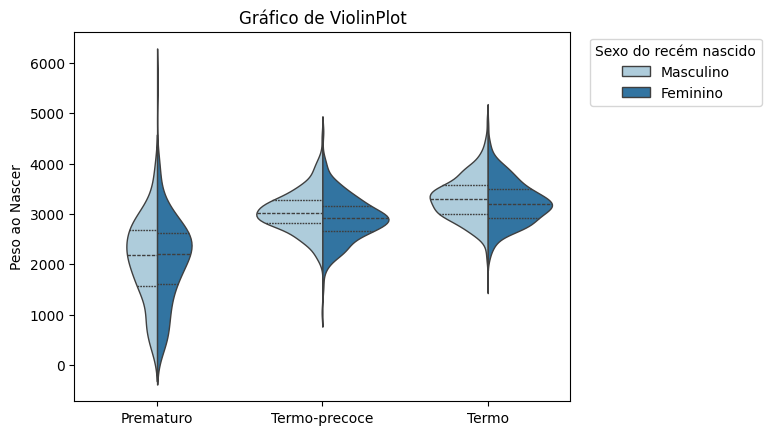

In [29]:
# Ordenação das categorias
ordem = ['Prematuro', 'Termo-precoce', 'Termo']

# Gráfico do tipo ViolinPlot
graf1 = sns.violinplot(data=dados, y="PESO_NASCER", x="IG_TERMO", hue="SEXO", order=ordem, palette="Paired", linewidth=1, split=True, inner="quart")

# Formatar o título do gráfico
graf1.set_title('Gráfico de ViolinPlot')

# Formatar os rótulos dos eixos
graf1.set_xlabel("")
graf1.set_ylabel("Peso ao Nascer")

# Colocar a legenda ao lado do gráfico
graf1.legend(bbox_to_anchor=(1.4,1), title='Sexo do recém nascido')

# FacetGrid e PairPlot

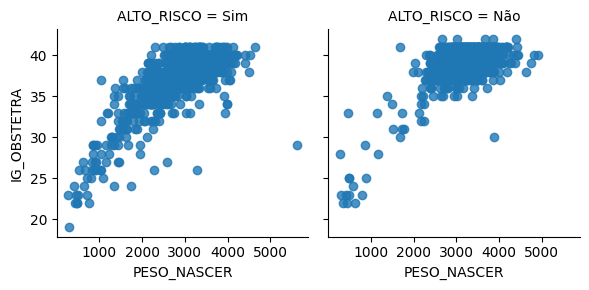

In [30]:
# análise cruzada de dados (variável contínua x categorica)
grafico = sns.FacetGrid(dados, col="ALTO_RISCO", margin_titles=True)
grafico.map(sns.regplot, "PESO_NASCER", "IG_OBSTETRA", fit_reg=False)

**PairPlot e PairGrid - Analisa o cruzamentos de todas as variáveis de todo o DataSet**

# FacetGrid - compara uma variável numérica com outras (categoricas ou numéricas)

<Axes: xlabel='PESO_NASCER', ylabel='Count'>

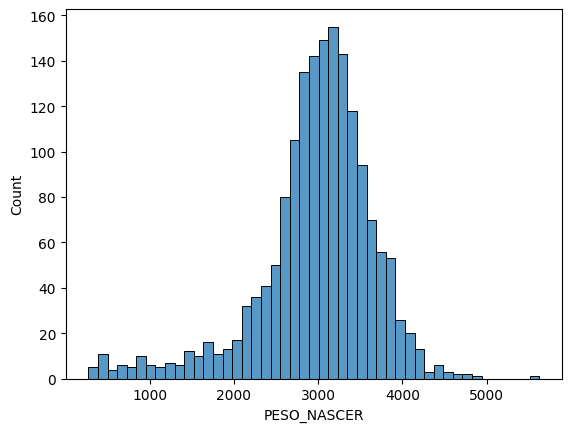

In [31]:
# Por exemplo, vamos rever o histograma do peso
sns.histplot(data=dados, x='PESO_NASCER')

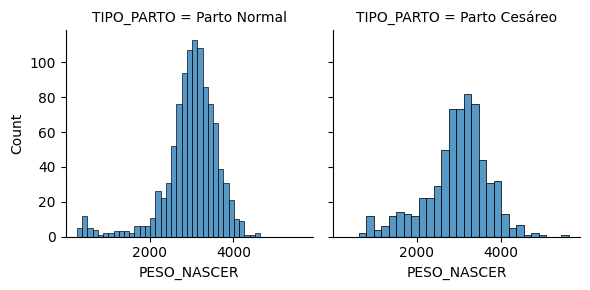

In [32]:
# análise cruzada de dados

# indica qual é a variável categórica para separar os dados
grafico = sns.FacetGrid(dados, col="TIPO_PARTO")

# indica que tipo de gráfico quer que a variável númerica seja mostrada
grafico.map(sns.histplot, "PESO_NASCER")

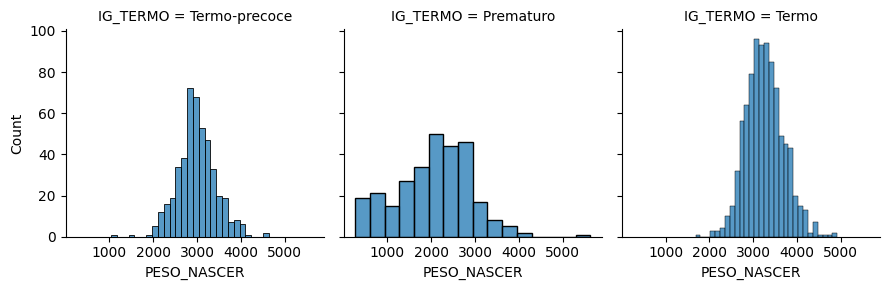

In [33]:
# análise cruzada de dados

# indica qual é a variável categórica para separar os dados
grafico = sns.FacetGrid(dados, col="IG_TERMO")

# indica que tipo de gráfico quer que a variável númerica seja mostrada
grafico.map(sns.histplot, "PESO_NASCER")

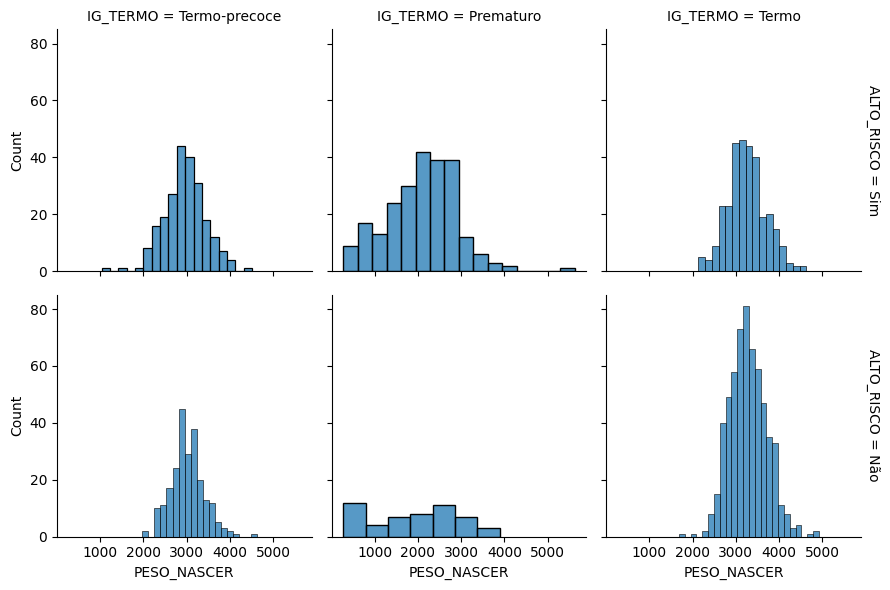

In [ ]:
# análise cruzada de dados (variável contínua x categorica)
grafico = sns.FacetGrid(dados, col="IG_TERMO", row="ALTO_RISCO", margin_titles=True)
grafico.map(sns.histplot, "PESO_NASCER")

https://seaborn.pydata.org/tutorial/axis_grids.html

# PairPlot cruza todas as variáveis numéricas

In [34]:
# PairPlot ou PairGrid, deve ser usado com um DataSet com algumas colunas apenas - Se não fica difícil de entender
colunas = ['DURACAO_INT', 'PESO_NASCER', 'IG_OBSTETRA', 'APGAR5', 'TIPO_PARTO', 'SEXO', 'IG_TERMO']
dados2 = dados[colunas]

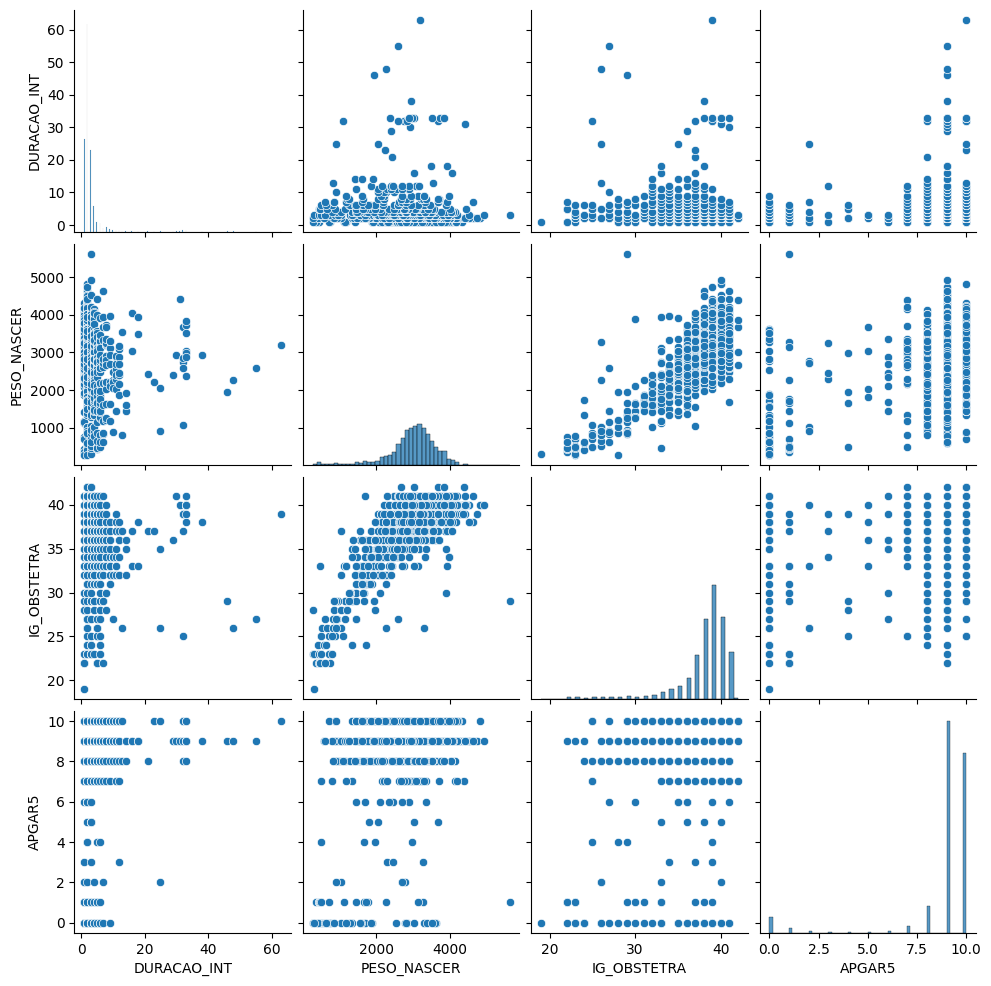

In [35]:
# PairPlot cruza todas as variáveis numéricas
# Fez o histograma na diagonal principal (pois é a mesma variavel)
# Os gráficos da diagonal superior são iguais aos dá diagonal inferior (com eixo invertido)

g = sns.pairplot(dados2, height=2.5)

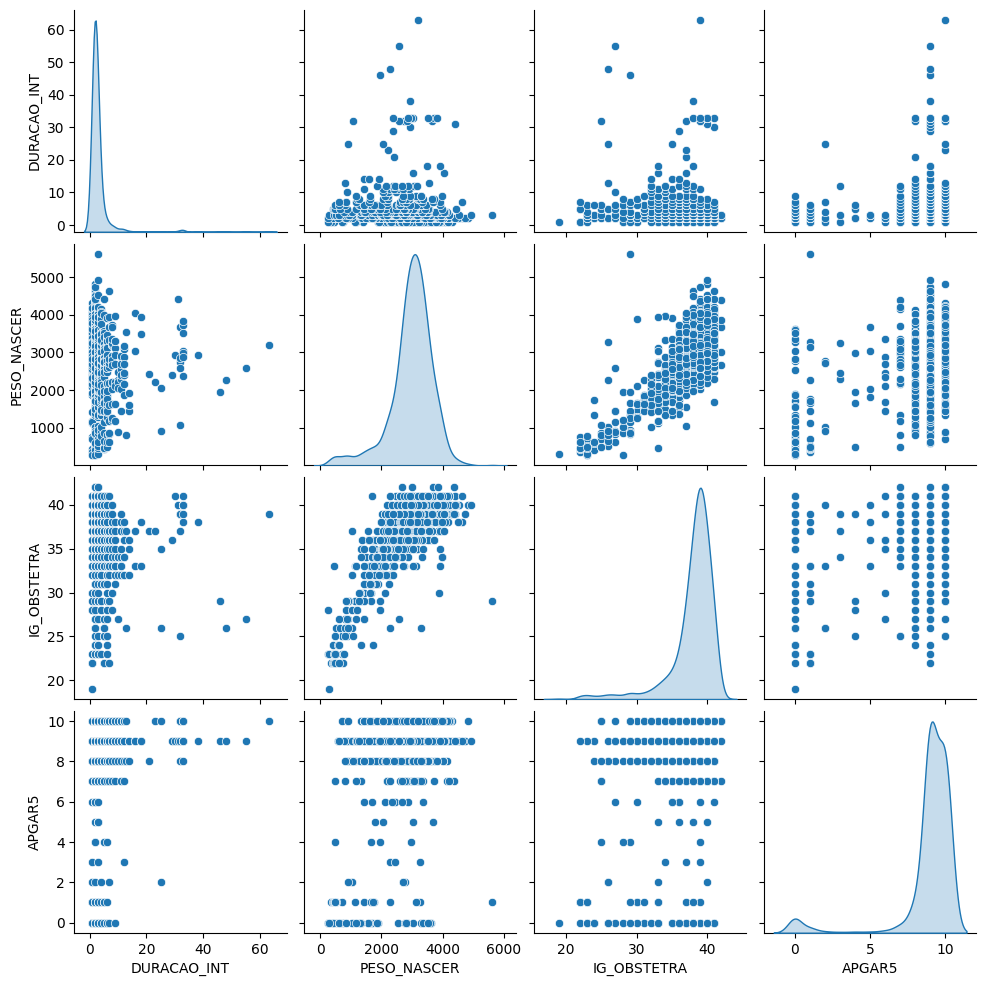

In [36]:
# PairPlot cruza todas as variáveis numéricas
# Fez o histograma (linha de densidade) na diagonal principal (pois é a mesma variavel)
# Os gráficos da diagonal superior são iguais aos dá diagonal inferior (com eixo invertido)

g = sns.pairplot(dados2, diag_kind="kde", height=2.5)

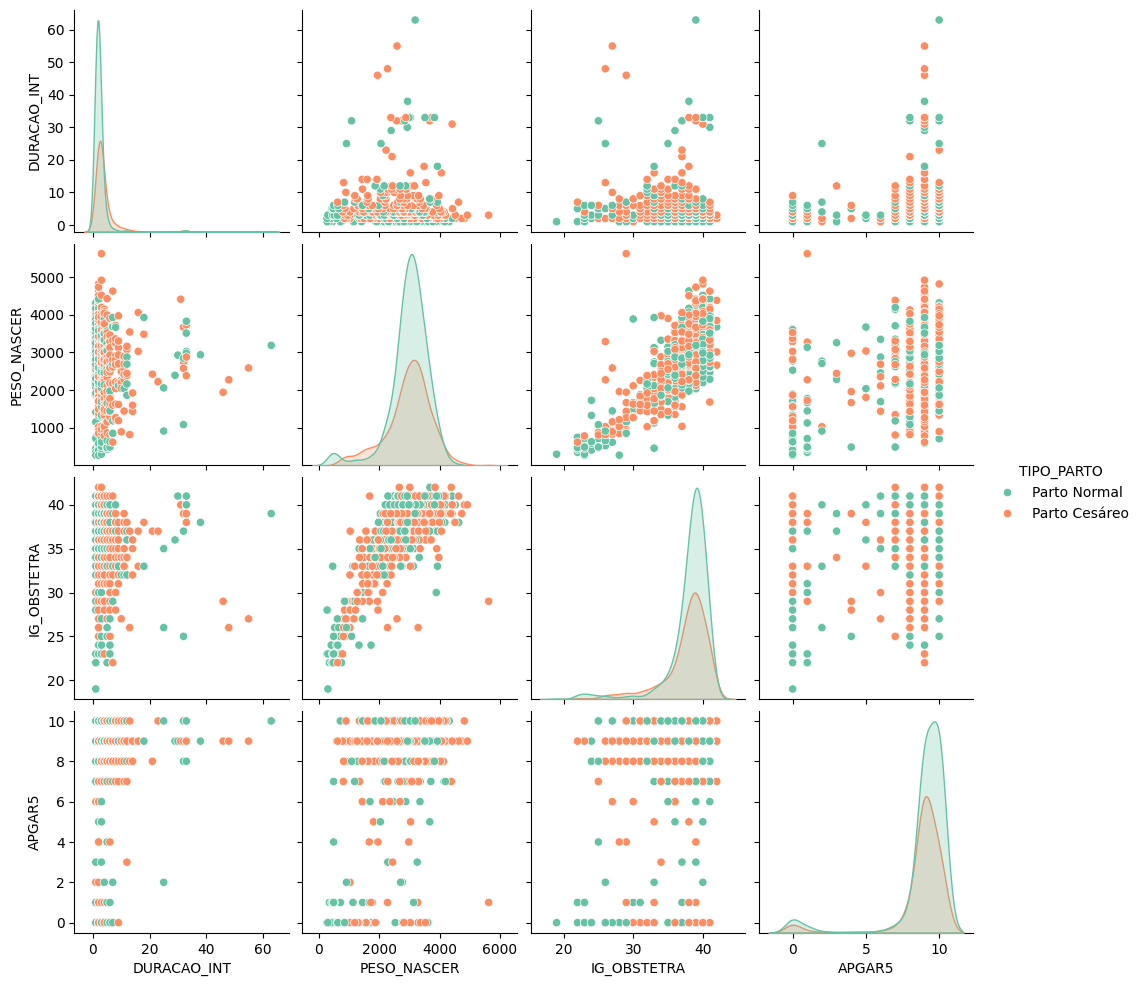

In [37]:
# PairPlot cruza todas as variáveis numéricas
# HUE faz uma divisão ainda de categorias
g = sns.pairplot(dados2, hue="TIPO_PARTO", palette="Set2", diag_kind="kde", height=2.5)

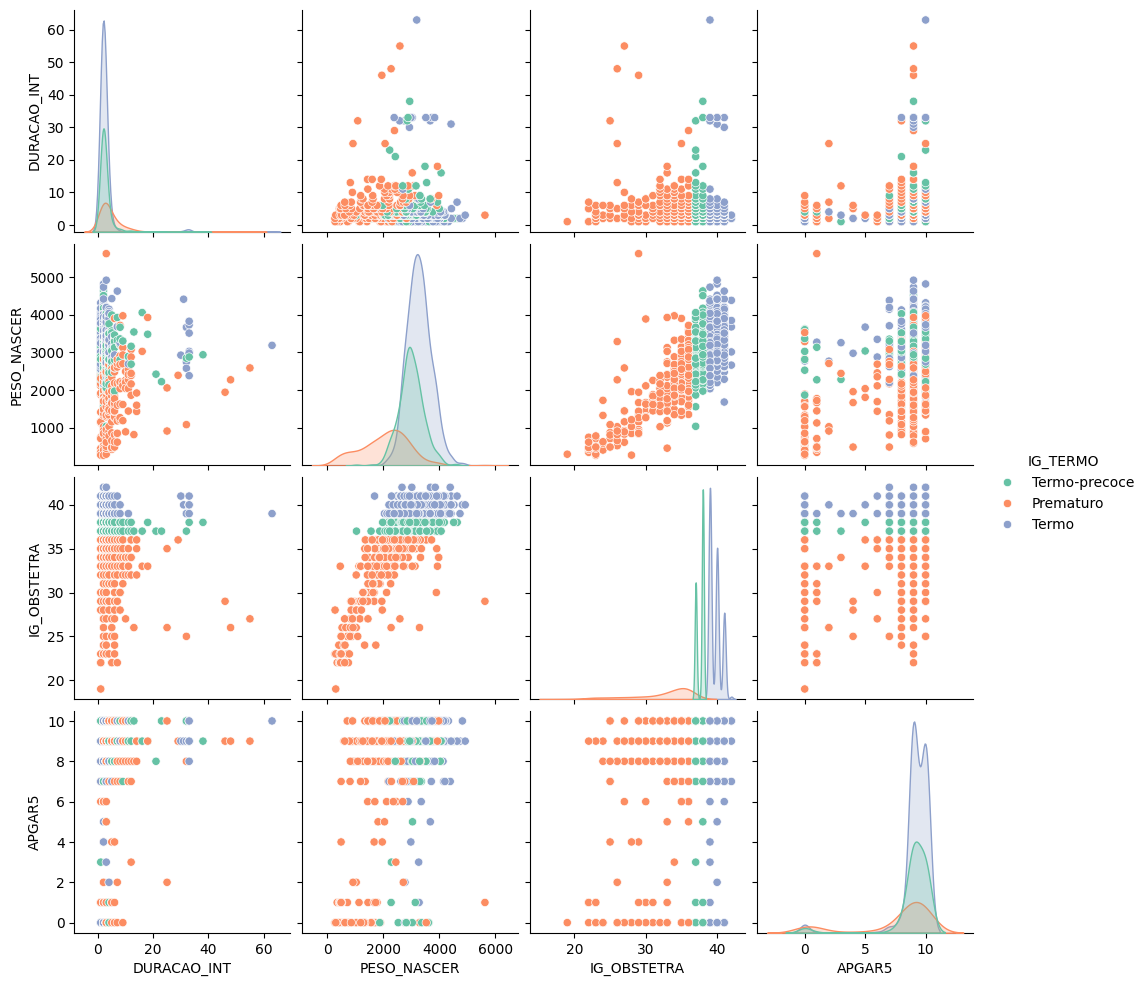

In [38]:
# PairPlot cruza todas as variáveis numéricas
# HUE faz uma divisão ainda de categorias
g = sns.pairplot(dados2, hue="IG_TERMO", palette="Set2", diag_kind="kde", height=2.5)

Saiba mais: https://seaborn.pydata.org/tutorial/axis_grids.html